In [2]:
# Import Cell
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile as wav
import scipy
import decimal
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal as sig

In [3]:
# Assignment 1 -- Time Scaling Audio Signals

# Part A
def timescale(x, fs, a):
    n, d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x, d, n)
    t = np.arange(0, len(y), 1)*(1 / fs)

C:\Users\G2945\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


<IPython.core.display.Javascript object>


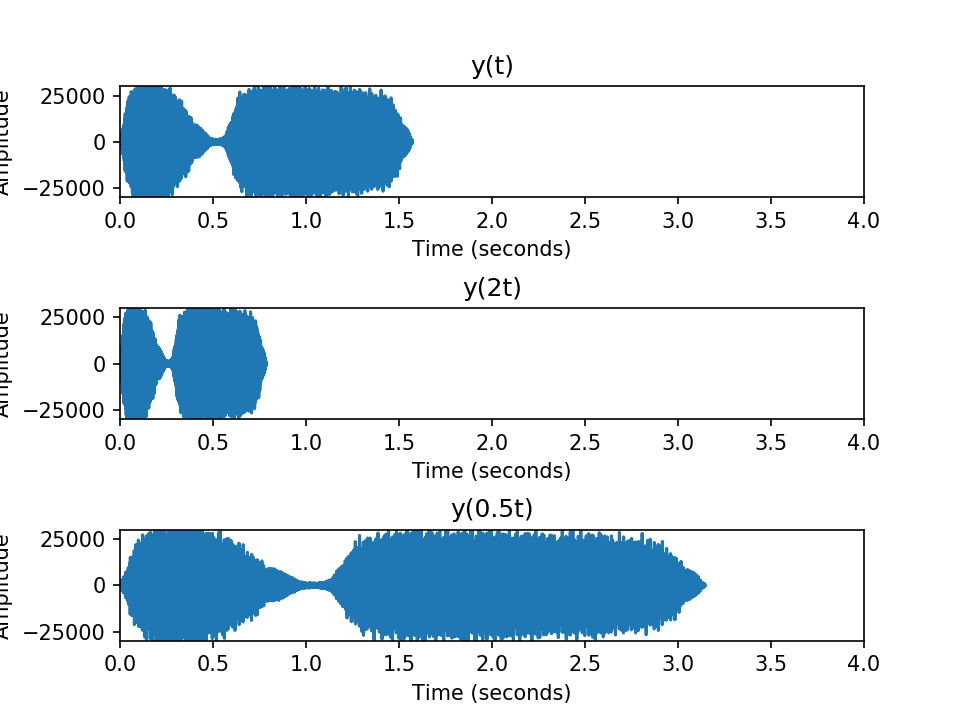

In [4]:
# Part B
fs, y = wav.read('train32.wav')
t_y = np.arange(0, len(y), 1) *(1 / fs)
play_obj = sa.play_buffer(y, 1, 2, fs)
play_obj.wait_done()

# Part C
def timescale(y, fs, a):
    n, d = decimal.Decimal(a).as_integer_ratio()
    w = sig.resample_poly(y, d, n)
    t_w = np.arange(0, len(w), 1)*(1 / fs)
    w = np.int16(w)  
    return w, t_w

w, t_w = timescale(y, fs, 2)
play_obj = sa.play_buffer(w, 1, 2, fs)
play_obj.wait_done()
v, t_v = timescale(y, fs, 0.5)
play_obj = sa.play_buffer(v, 1, 2, fs)
play_obj.wait_done()

# Part D
fig = plt.figure(1)
fig.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3, 1, 1)
plt.plot(t_y, y)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(t)')
plt.show()

plt.subplot(3, 1, 2)
plt.plot(t_w, w)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(2t)')
plt.show()

plt.subplot(3, 1, 3)
plt.plot(t_v, v)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(0.5t)')
plt.show()

In [5]:
# Assignment 2 -- Time Shift Operation

# Part A
def timeshift(x, fs, t0):
    n0 = abs(int(t0 * fs))
    xt = np.zeros(n0)
    if t0 > 0 :
        sound = x[n0:]
        y = np.concatenate([sound, xt])
    else: 
        y = np.concatenate([xt, x])
    t = np.arange(0, len(y), 1)*(1/fs)
    return y.astype('int16'), t

<IPython.core.display.Javascript object>


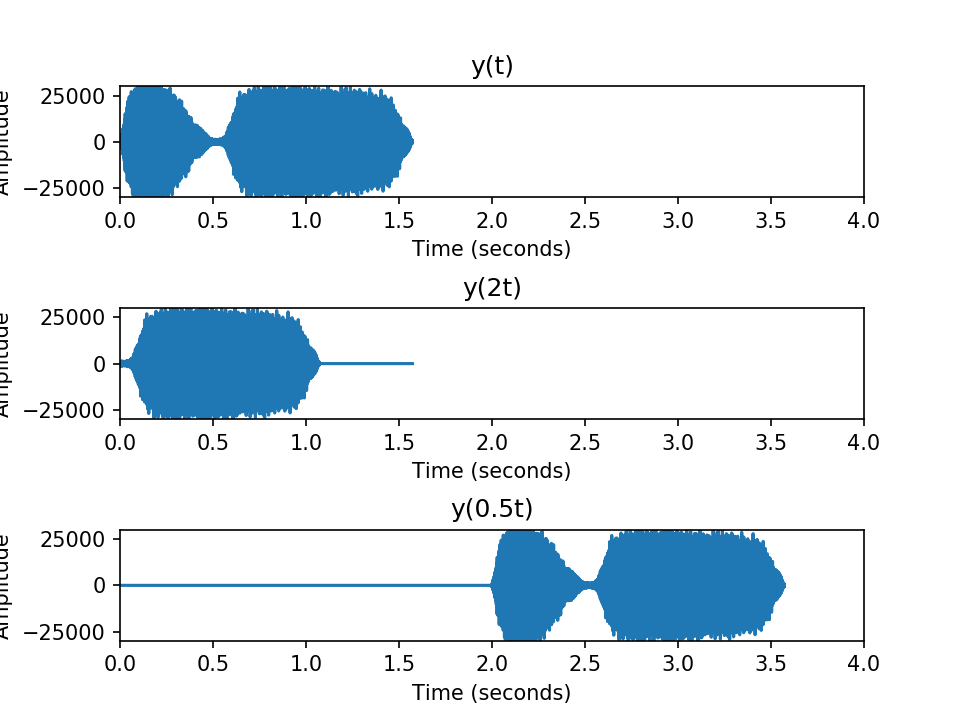

In [6]:
# Part B
fig = plt.figure(2)
fig.subplots_adjust(hspace = 1, wspace = 1)

y_1, t = timeshift(y, fs, 0)
plt.subplot(3, 1, 1)
plt.plot(t, y_1)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(t)')
plt.show()

y_2, t = timeshift(y, fs, .5)
plt.subplot(3, 1, 2)
plt.plot(t, y_2)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(2t)')
plt.show()

y_3, t = timeshift(y, fs, -2)
plt.subplot(3, 1, 3)
plt.plot(t, y_3)
plt.xlim(0, 4)
plt.ylim(-30000, 30000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(0.5t)')
plt.show()

# Part C
play_obj = sa.play_buffer(y_1, 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(y_2, 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(y_3, 1, 2, fs)
play_obj.wait_done()






<IPython.core.display.Javascript object>


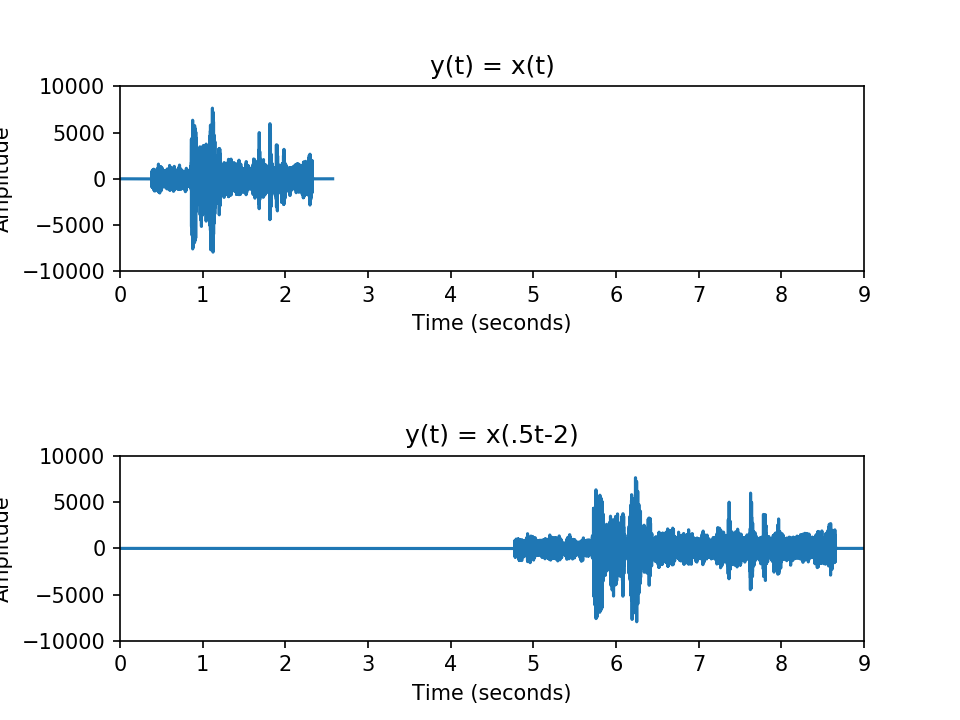

In [7]:
# Part A
s4_fs, s4 = wav.read('s4.wav')
y_a, ta = timescale(s4, s4_fs, 2)
ya, ta = timeshift(y_a, s4_fs, -.25)

y_b, tb = timescale(s4, s4_fs, .5)
yb, tb = timeshift(y_b, s4_fs, -4)

# Part B
play_obj = sa.play_buffer(ya, 1, 2, s4_fs)
play_obj.wait_done()
play_obj = sa.play_buffer(yb, 1, 2, s4_fs)
play_obj.wait_done()

# Part C
t_y = np.arange(0, len(s4), 1)*(1 / s4_fs)
fig = plt.figure(3)
fig.subplots_adjust(hspace = 1, wspace = 1)

plt.subplot(2, 1, 1)
plt.plot(t_y, s4)
plt.xlim(0, 9)
plt.ylim(-10000, 10000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(t) = x(t)')
plt.show()

t_y = np.arange(0, len(yb), 1)*(1 / s4_fs)
plt.subplot(2, 1, 2)
plt.plot(t_y, yb)
plt.xlim(0, 9)
plt.ylim(-10000, 10000)
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.title('y(t) = x(.5t-2)')
plt.show()